# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tasks

###  Dataset

streams.csv - one row per date, country, region, gender, n_of_streams

n_of_streams - total number of spotify streams for the artist, that is how many times song of that artist were listened to (the entrire dataset relates to one artist only)


In [2]:
streams = pd.read_csv('C:/Users/USER/Desktop/python/Python/homeworks/final_project/streams.csv')

In [3]:
streams.head()

,Unnamed: 0,date,country,region,gender,n_of_streams
0,0,2021-10-19,US,539,NaN,23
1,1,2021-10-20,SE,SE-AB,male,110
2,2,2021-10-26,FR,FR-67,male,3
3,3,2021-11-28,EC,EC-F,female,3
4,4,2021-10-17,GR,GR-54,NaN,1


In [4]:
streams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233741 entries, 0 to 233740
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Unnamed: 0    233741 non-null  int64 
 1   date          233741 non-null  object
 2   country       233707 non-null  object
 3   region        231339 non-null  object
 4   gender        201886 non-null  object
 5   n_of_streams  233741 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 10.7+ MB


### Tasks

### Task 1. Report following numbers

1.1 dataset shape

In [5]:
streams.shape

(233741, 6)

1.2 min, max date available

In [6]:
min_value = streams['date'].min()
max_value = streams['date'].max()

print(f'min date available = {min_value}')
print(f'max date available = {max_value}')

min date available = 2021-10-09
max date available = 2021-12-11


1.3 number of countries, regions, genders

In [7]:
number_of_countries = streams['country'].value_counts().count()
number_of_regions = streams['region'].value_counts().count()
number_of_genders = streams['gender'].value_counts().count()

print(f'number_of_countries = {number_of_countries}')
print(f'number_of_regions = {number_of_regions}')
print(f'number_of_genders = {number_of_genders}')

number_of_countries = 176
number_of_regions = 2359
number_of_genders = 3


1.4 number of missing values for country, region, gender, streams

In [8]:
for column in ['country', 'region', 'gender', 'n_of_streams']:
    print(f"number of missing values for {column}: ", streams[column].isnull().sum())

number of missing values for country:  34
number of missing values for region:  2402
number of missing values for gender:  31855
number of missing values for n_of_streams:  0


### Task 2. Report following descriptive tables

#### 2.A. per country

2.A.1 number of regions

In [9]:
number_of_regions = streams.groupby("country")["region"].nunique()

2.A.2   total number of streams

2.A.3   average number of streams

2.A.4   standard deviation



In [10]:
group_by_country = streams.groupby(['country']).agg(
    total_num_of_streams = pd.NamedAgg('n_of_streams', sum ),
    avg_num_of_streams = pd.NamedAgg('n_of_streams', np.nanmean ),
    st_dev_of_streams = pd.NamedAgg('n_of_streams', np.nanstd )
)

2.A.5   percentage of total number of streams

In [11]:
total_num = streams["n_of_streams"].sum()

group_by_country["percentage"] = [(x/total_num)*100 for x in group_by_country['total_num_of_streams']]

In [12]:
country = pd.DataFrame(number_of_regions).index

In [13]:
df = pd.DataFrame()
df["country"] = country

In [14]:
per_country = pd.merge( df["country"], number_of_regions, on="country")
per_country = pd.merge( per_country, group_by_country, on="country")

per_country = per_country.rename({'region': 'num_of_regions'}, axis=1)

In [15]:
per_country.head()

,country,num_of_regions,total_num_of_streams,avg_num_of_streams,st_dev_of_streams,percentage
0,AD,7,645,2.320144,1.815007,0.005185
1,AE,7,3409,4.998534,4.283458,0.027404
2,AG,3,32,1.333333,1.129319,0.000257
3,AL,7,270,1.607143,1.121567,0.002170
4,AM,3,32,1.000000,0.000000,0.000257


2.A.6 order final result by country

In [16]:
per_country_asc = per_country.sort_values(by=['country'])

In [17]:
per_country_asc.head()

,country,num_of_regions,total_num_of_streams,avg_num_of_streams,st_dev_of_streams,percentage
0,AD,7,645,2.320144,1.815007,0.005185
1,AE,7,3409,4.998534,4.283458,0.027404
2,AG,3,32,1.333333,1.129319,0.000257
3,AL,7,270,1.607143,1.121567,0.002170
4,AM,3,32,1.000000,0.000000,0.000257


In [18]:
per_country_desc = per_country.sort_values(by=['country'], ascending=False)

In [19]:
per_country_desc.head()

,country,num_of_regions,total_num_of_streams,avg_num_of_streams,st_dev_of_streams,percentage
175,ZW,1,15,1.500000,0.707107,0.000121
174,ZM,3,45,1.153846,0.431549,0.000362
173,ZA,10,4998,5.426710,5.603697,0.040178
172,XK,1,100,1.351351,0.729654,0.000804
171,VU,1,2,1.000000,0.000000,0.000016


visualization for 2.A

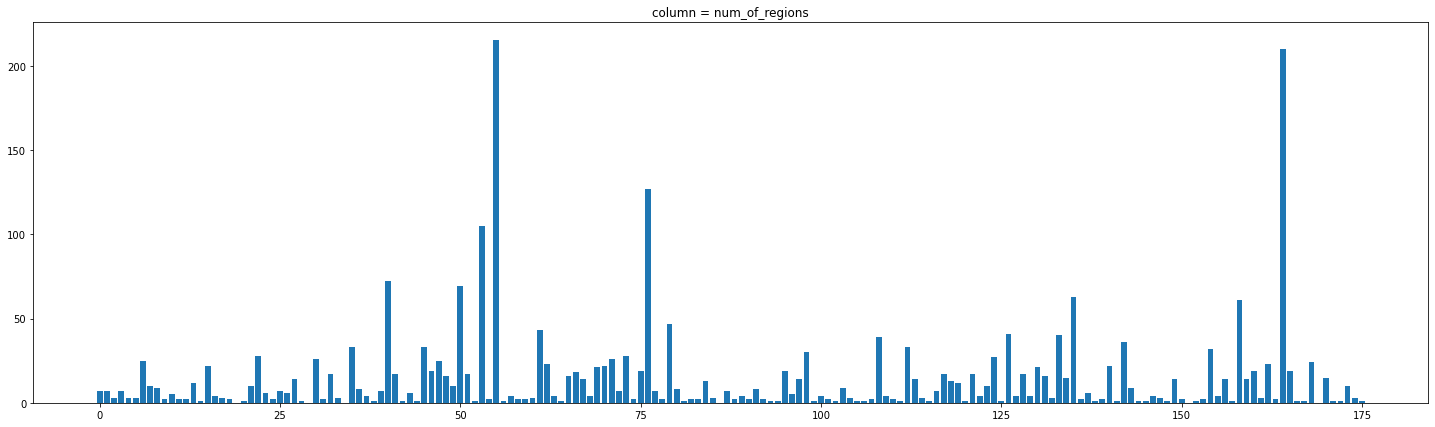

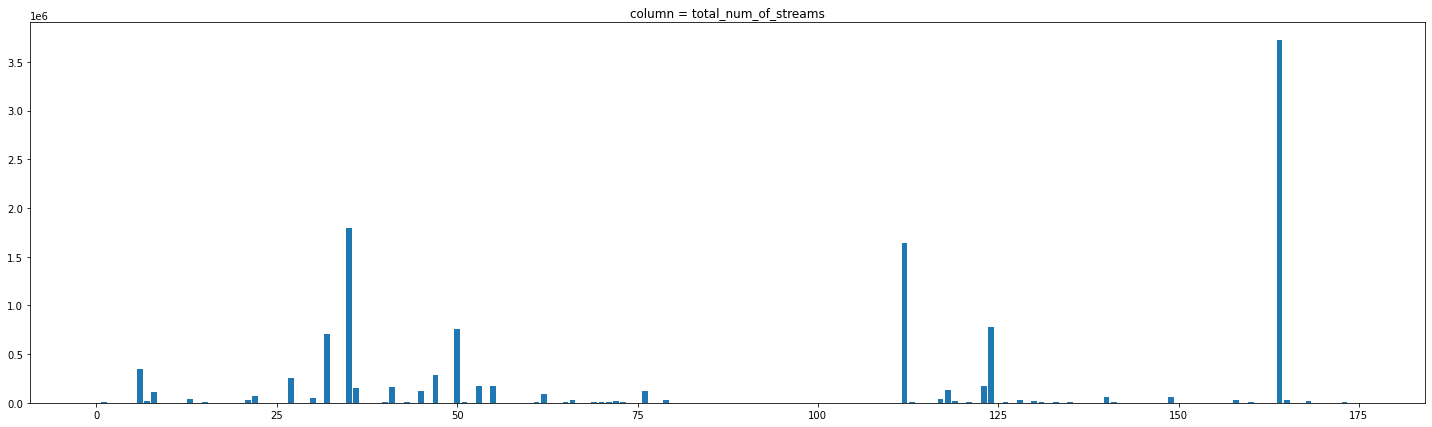

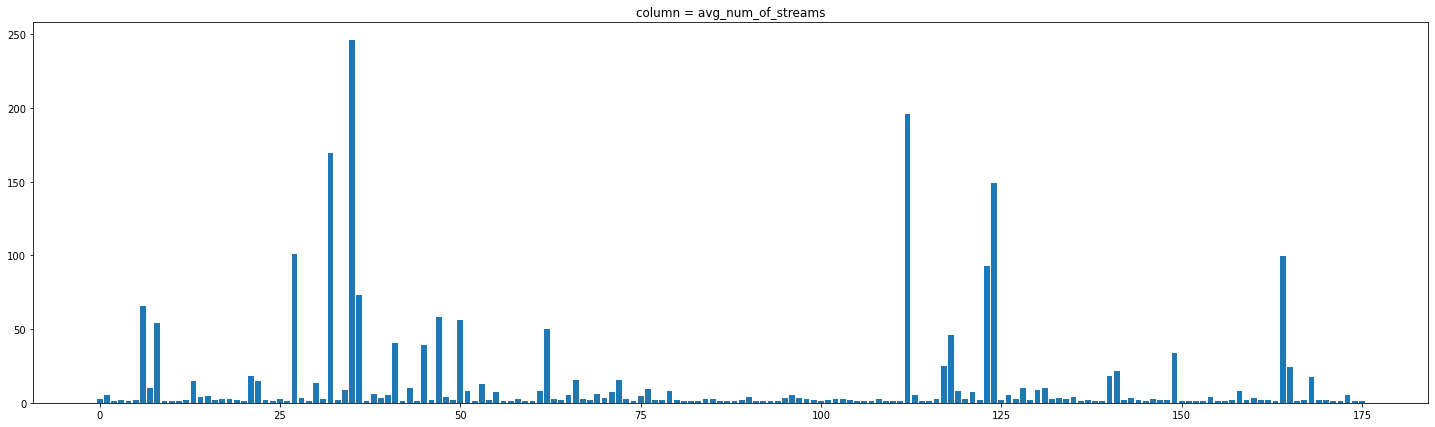

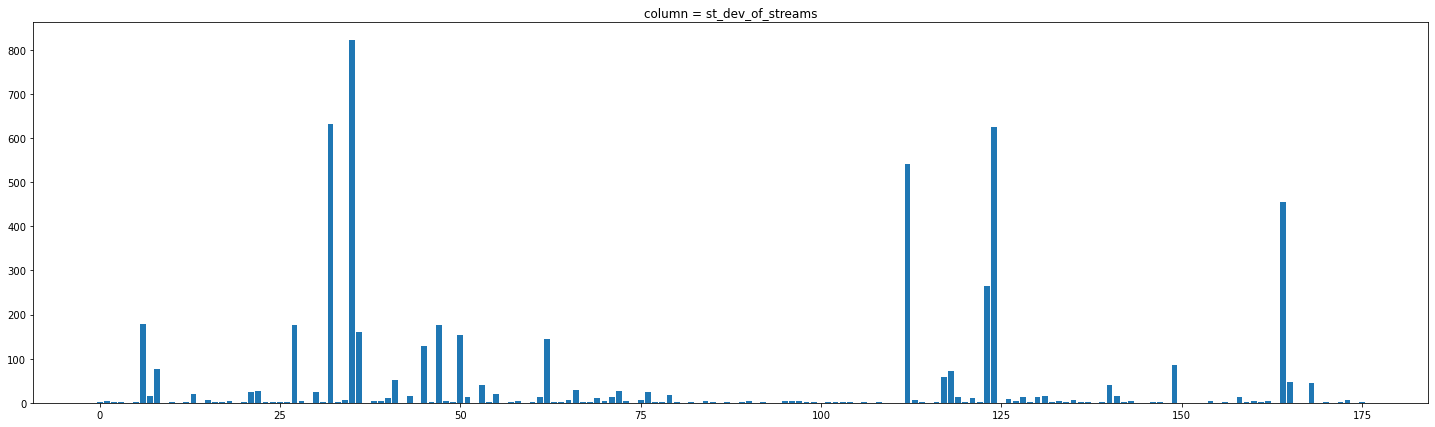

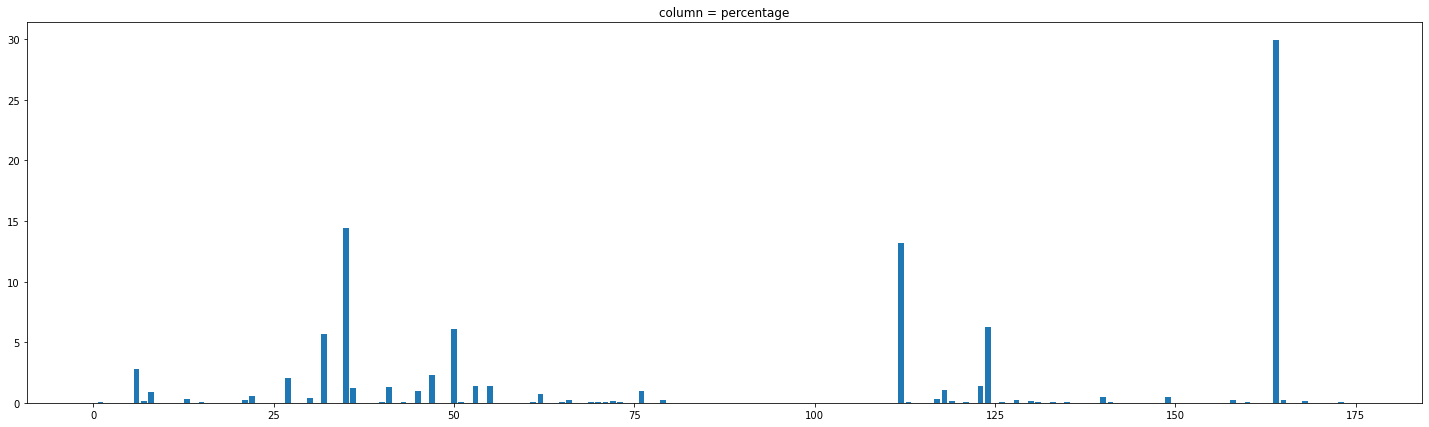

In [21]:
for col in per_country_asc:
    if col == "country":
        continue
    plt.figure(figsize=(25, 7))
    plt.bar(per_country_asc["country"].index, per_country_asc[col])
    plt.title(f"column = {col}")
    plt.show();

#### 2.B per gender

2.B.1 number of streams

In [36]:
num_of_streams = streams.groupby("gender")["n_of_streams"].sum()

2.B.2 percentage of streams


In [37]:
percentage = [(x/total_num)*100 for x in num_of_streams]

2.B.3 number of distinct regions

In [38]:
num_of_distinct_regions = streams.groupby("gender")["region"].nunique()

In [39]:
genders = pd.DataFrame(num_of_streams).index
df = pd.DataFrame()
df["gender"] = gender
per_gender = pd.merge( df["gender"], num_of_streams, on="gender")
per_gender = pd.merge( per_gender, num_of_distinct_regions, on="gender")
per_gender["percentage"] = percentage

In [40]:
per_gender = per_gender.rename({'n_of_streams': 'num_of_streams'}, axis=1)
per_gender = per_gender.rename({'region': 'num_of_distinct_regions'}, axis=1)

In [41]:
per_gender.head()

,gender,num_of_streams,num_of_distinct_regions,percentage
0,all,5925588,2331,47.634535
1,female,2269890,1997,18.247160
2,male,3655698,2168,29.387375


visualization for 2.B

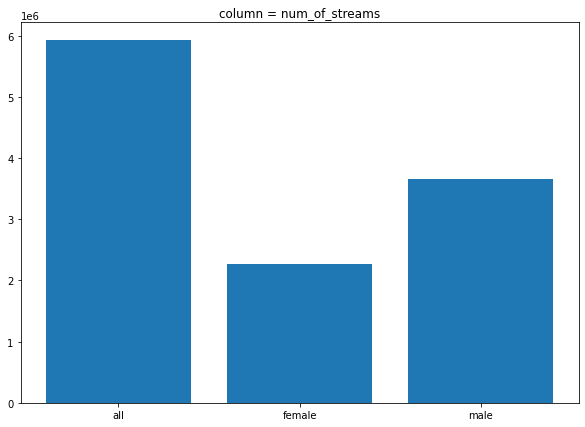

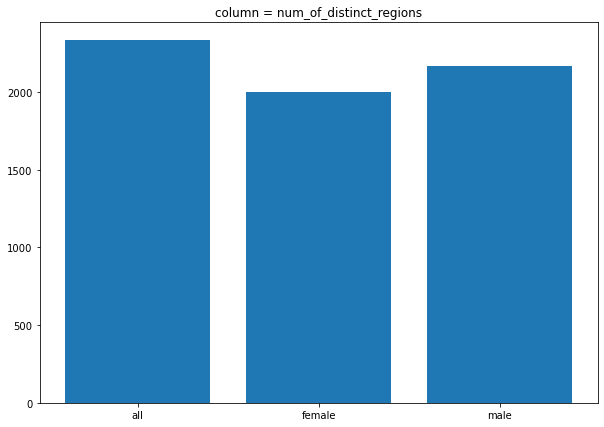

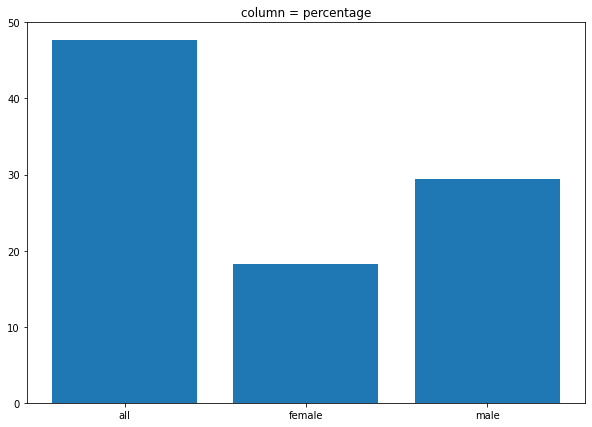

In [42]:
for col in per_gender:
    if col == "gender":
        continue
    plt.figure(figsize=(10, 7))
    plt.bar(per_gender["gender"], per_gender[col])
    plt.title(f"column = {col}")
    plt.show();

### Task 3. Detect outliers

3.1 create "_outlier" variable of boolean type

3.2 Assign a value True if the row is considered an outlier, and False if not


3.3 A row is considered an outlier if the value of n_of_streams is out of +-1.5*IQR for country, region, gender group

In [43]:
_outlier = False

In [44]:
def is_outlier(df):
    _outlier = False
    q3, q1 = np.percentile(df, [75 ,25])
    iqr = q3 - q1
    upper_quartiles = q3 + 1.5 * iqr
    lower_quartiles = q1 - 1.5 * iqr

    _outliers=[]

    for stream in df:
        if stream < lower_quartiles or stream > upper_quartiles:
            _outlier = True
        _outliers.append(_outlier)
        _outlier = False
    return _outliers

In [45]:
streams["is_outlier"] = is_outlier(streams["n_of_streams"])

In [46]:
streams.head()

,Unnamed: 0,date,country,region,gender,n_of_streams,is_outlier
0,0,2021-10-19,US,539,NaN,23,False
1,1,2021-10-20,SE,SE-AB,male,110,True
2,2,2021-10-26,FR,FR-67,male,3,False
3,3,2021-11-28,EC,EC-F,female,3,False
4,4,2021-10-17,GR,GR-54,NaN,1,False


In [47]:
streams["is_outlier"].value_counts()

False    200031
True      33710
Name: is_outlier, dtype: int64

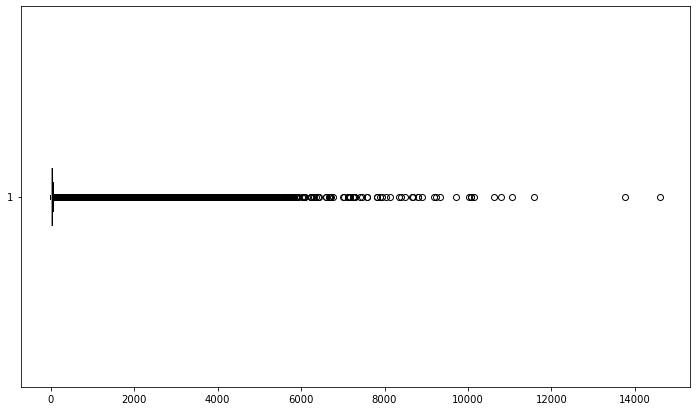

In [48]:
plt.figure(figsize =(12, 7))

plt.boxplot(streams['n_of_streams'], vert = 0)
plt.show();

outliers grouped by country

In [49]:
streams.groupby('country')['is_outlier'].sum().to_frame().head(10)

,is_outlier
country,
AD,0
AE,0
AG,0
AL,0
AM,0
AO,0
AR,1174
AT,85
AU,680


outliers grouped by gender

In [50]:
streams.groupby('gender')['is_outlier'].sum().to_frame().head()

,is_outlier
gender,
all,14013
female,7890
male,9899


outliers grouped by region

In [51]:
streams.groupby('region')['is_outlier'].sum().to_frame().head()

,is_outlier
region,
500,2
501,256
502,0
503,0
504,198


### Task 4. Generate spikes

4.1 A spike is defined as an occasion when the moving average for the number of streams(previous 3 days) proceeds the moving average for the number of streams(previous 10 days) by 10 percent


4.2 Create a boolean variable which shows if the instance is a spike of not

4.3 Compute number of spikes per group (country, region, gender (male, female, all))

In [52]:
streams_copy = streams.sort_values(by=['date'])
streams_copy.head()

,Unnamed: 0,date,country,region,gender,n_of_streams,is_outlier
77705,77705,2021-10-09,GB,GB-WFT,all,9,False
143821,143821,2021-10-09,NL,NL-GR,female,6,False
86199,86199,2021-10-09,ES,ES-Z,all,82,True
86210,86210,2021-10-09,AR,AR-Y,all,6,False
86235,86235,2021-10-09,EC,EC-C,all,5,False


In [53]:
date = streams.groupby("date")["n_of_streams"].sum()
index = date.index
dates_tab = pd.DataFrame()
dates_tab["date"] = index
dates_tab = pd.merge(dates_tab, date, on="date")

In [54]:
dates_tab.head()

,date,n_of_streams
0,2021-10-09,238115
1,2021-10-10,206134
2,2021-10-11,177108
3,2021-10-12,177516
4,2021-10-13,178170


In [55]:
is_spikes = [np.nan for i in range(10)]

s = []
a = dates_tab["n_of_streams"]

for i in range(10, len(a)):
    sum_3_day = (a[i-1] + a[i-2] + a[i-3])
    sum_10_day = sum_3_day
    
    for j in range(4, 11):
        sum_10_day += a[i-j]
    
    avg_3_day = sum_3_day/3
    avg_10_day = sum_10_day/10
    
    S = avg_3_day/avg_10_day
    s.append(S)
    if S > 1.1:
        is_spikes.append(True)
    else:
        is_spikes.append(False)

In [56]:
dates_tab["is_spikes"] = is_spikes

In [57]:
dates_tab.head(15)

,date,n_of_streams,is_spikes
0,2021-10-09,238115,NaN
1,2021-10-10,206134,NaN
2,2021-10-11,177108,NaN
3,2021-10-12,177516,NaN
4,2021-10-13,178170,NaN
5,2021-10-14,182138,NaN
6,2021-10-15,207792,NaN
7,2021-10-16,239299,NaN
8,2021-10-17,213122,NaN
9,2021-10-18,175333,NaN


In [58]:
dates_tab["is_spikes"].value_counts()

False    53
True      1
Name: is_spikes, dtype: int64

In [59]:
dates_tab = dates_tab.drop("n_of_streams", axis=1)
streams = pd.merge(streams, dates_tab, on="date")

In [60]:
streams.head()

,Unnamed: 0,date,country,region,gender,n_of_streams,is_outlier,is_spikes
0,0,2021-10-19,US,539,NaN,23,False,False
1,79,2021-10-19,RO,RO-AR,female,1,False,False
2,87,2021-10-19,AR,AR-U,NaN,1,False,False
3,96,2021-10-19,BR,BR-PB,female,2,False,False
4,151,2021-10-19,BE,BE-VAN,female,8,False,False


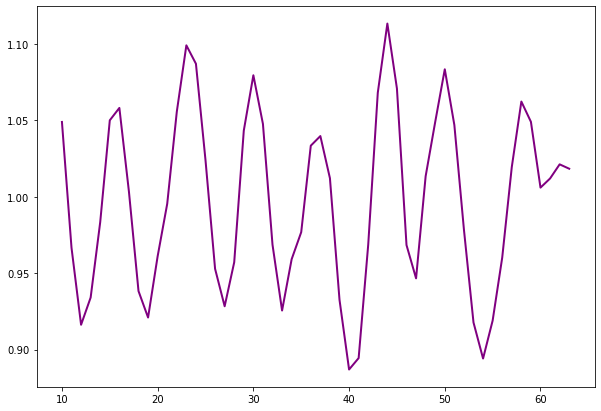

In [61]:
x = [i for i in range(10, len(dates_tab["date"]))]
plt.figure(figsize = (10, 7))

plt.plot(x, s, "purple", linewidth = 2)
plt.show()